In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing basic libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset int a dataframe called df

In [3]:
df=pd.read_csv('/content/drive/MyDrive/diabetes_012_health_indicators_BRFSS2015.csv')

In [ ]:
!pip install -U scikit-learn

# Finding for null values

In [ ]:
df.head()
df.isna().sum()

,0
Diabetes_012,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


In [5]:
df.shape

(253680, 22)

## Droping duplicate values

In [ ]:
df = df.drop_duplicates()

In [ ]:
df['Diabetes_012'].value_counts()

,count
Diabetes_012,
0.0,190055
2.0,35097
1.0,4629


# Perfroming EDA

In [ ]:
print("\nData types:")
print(df.dtypes)
print("\nSummary statistics:")
print(df.describe())


Data types:
Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

Summary statistics:
        Diabetes_012         HighBP       HighChol      CholCheck  \
count  229781.000000  229781.000000  229781.000000  229781.000000   
mean        0.325627       0.454441       0.441760       0.959535   
std         0.724623       0.497921      

In [ ]:
# 1. Understanding the Variables
print("\n--- Variable Information ---")
# Display unique values and their counts for categorical variables
categorical_vars = ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'Smoker',
                   'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
                   'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
                   'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
print("\nCategory Distribution:")
for var in categorical_vars:
    if var in df.columns:
        print(f"\n{var} value counts:")
        print(df[var].value_counts())


--- Variable Information ---

Category Distribution:

Diabetes_012 value counts:
Diabetes_012
0.0    190055
2.0     35097
1.0      4629
Name: count, dtype: int64

HighBP value counts:
HighBP
0.0    125359
1.0    104422
Name: count, dtype: int64

HighChol value counts:
HighChol
0.0    128273
1.0    101508
Name: count, dtype: int64

CholCheck value counts:
CholCheck
1.0    220483
0.0      9298
Name: count, dtype: int64

Smoker value counts:
Smoker
0.0    122781
1.0    107000
Name: count, dtype: int64

Stroke value counts:
Stroke
0.0    219497
1.0     10284
Name: count, dtype: int64

HeartDiseaseorAttack value counts:
HeartDiseaseorAttack
0.0    206064
1.0     23717
Name: count, dtype: int64

PhysActivity value counts:
PhysActivity
1.0    168511
0.0     61270
Name: count, dtype: int64

Fruits value counts:
Fruits
1.0    140848
0.0     88933
Name: count, dtype: int64

Veggies value counts:
Veggies
1.0    182633
0.0     47148
Name: count, dtype: int64

HvyAlcoholConsump value counts:
HvyAl

In [ ]:
# 2. Data Cleaning and Preparation

# 2.1 Rename columns for better readability
column_mapping = {
    'Diabetes_012': 'diabetes_status',
    'HighBP': 'high_blood_pressure',
    'HighChol': 'high_cholesterol',
    'CholCheck': 'cholesterol_check',
    'PhysActivity': 'physical_activity',
    'HvyAlcoholConsump': 'heavy_alcohol_consumption',
    'AnyHealthcare': 'has_healthcare',
    'NoDocbcCost': 'no_doctor_due_to_cost',
    'GenHlth': 'general_health',
    'MentHlth': 'mental_health_days',
    'PhysHlth': 'physical_health_days',
    'DiffWalk': 'difficulty_walking',
}

df_clean = df.rename(columns=column_mapping)

diabetes_map = {0: 'No Diabetes', 1: 'Prediabetes', 2: 'Diabetes'}
df_clean['diabetes_category'] = df_clean['diabetes_status'].map(diabetes_map)

# Convert binary variables (0/1) to descriptive values
binary_vars = ['high_blood_pressure', 'high_cholesterol', 'cholesterol_check',
               'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'physical_activity',
               'Fruits', 'Veggies', 'heavy_alcohol_consumption', 'has_healthcare',
               'no_doctor_due_to_cost', 'difficulty_walking', 'Sex']
for var in binary_vars:
    if var in df_clean.columns:
        df_clean[var] = df_clean[var].map({0: 'No', 1: 'Yes'})

In [ ]:
# Convert general_health (1-5) to descriptive values
health_map = {1: 'Excellent', 2: 'Very Good', 3: 'Good', 4: 'Fair', 5: 'Poor'}
df_clean['general_health_category'] = df_clean['general_health'].map(health_map)

# Convert education level
education_map = {1: 'Never attended school', 2: 'Elementary', 3: 'Some high school',
                 4: 'High school graduate', 5: 'Some college', 6: 'College graduate'}
df_clean['education_level'] = df_clean['Education'].map(education_map)

# Convert age categories
age_map = {1: '18-24', 2: '25-29', 3: '30-34', 4: '35-39', 5: '40-44',
           6: '45-49', 7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69',
           11: '70-74', 12: '75-79', 13: '80+'}
df_clean['age_group'] = df_clean['Age'].map(age_map)

# Convert income categories
income_map = {1: 'Less than $10,000', 2: '$10,000-$15,000', 3: '$15,000-$20,000',
              4: '$20,000-$25,000', 5: '$25,000-$35,000', 6: '$35,000-$50,000',
              7: '$50,000-$75,000', 8: '$75,000+'}
df_clean['income_range'] = df_clean['Income'].map(income_map)

# Convert sex
df_clean['gender'] = df_clean['Sex'].map({0: 'Female', 1: 'Male'})

In [ ]:
# 2.2 Handle BMI outliers (create BMI category)
# Create BMI categories according to WHO classification
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    elif 30 <= bmi < 35:
        return 'Obese Class I'
    elif 35 <= bmi < 40:
        return 'Obese Class II'
    else:
        return 'Obese Class III'

df_clean['bmi_category'] = df_clean['BMI'].apply(categorize_bmi)


In [ ]:
# 2.3 Transform mental and physical health days
# Convert 30 days to "All Month" for clearer understanding
df_clean['mental_health_status'] = df_clean['mental_health_days'].apply(
    lambda x: 'All Month' if x == 30 else (
        'None' if x == 0 else (
            '1-5 days' if x <= 5 else (
                '6-15 days' if x <= 15 else '16-29 days'
            )
        )
    )
)

df_clean['physical_health_status'] = df_clean['physical_health_days'].apply(
    lambda x: 'All Month' if x == 30 else (
        'None' if x == 0 else (
            '1-5 days' if x <= 5 else (
                '6-15 days' if x <= 15 else '16-29 days'
            )
        )
    )
)

In [ ]:
# 2.4 Select relevant columns (subset)
df_subset = df_clean[[
    'diabetes_status', 'diabetes_category', 'high_blood_pressure', 'high_cholesterol',
    'BMI', 'bmi_category', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
    'physical_activity', 'Fruits', 'Veggies', 'heavy_alcohol_consumption',
    'general_health_category', 'mental_health_status', 'physical_health_status',
    'gender', 'age_group', 'education_level', 'income_range'
]]


In [ ]:
# 3. Create derived features
# 3.1 Create a risk factor count
risk_factors = ['high_blood_pressure', 'high_cholesterol', 'Smoker',
                'Stroke', 'HeartDiseaseorAttack']

# Count 'Yes' values across risk factors
df_subset['risk_factor_count'] = df_subset[risk_factors].apply(
    lambda row: (row == 'Yes').sum(), axis=1
)

# 5.2 Create lifestyle score based on positive behaviors
# Higher score = healthier lifestyle
df_subset['lifestyle_score'] = 0
# Add 1 for each healthy behavior
df_subset.loc[df_subset['physical_activity'] == 'Yes', 'lifestyle_score'] += 1
df_subset.loc[df_subset['Fruits'] == 'Yes', 'lifestyle_score'] += 1
df_subset.loc[df_subset['Veggies'] == 'Yes', 'lifestyle_score'] += 1
df_subset.loc[df_subset['heavy_alcohol_consumption'] == 'No', 'lifestyle_score'] += 1
df_subset.loc[df_subset['Smoker'] == 'No', 'lifestyle_score'] += 1

<ipython-input-15-876feba5bd44>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['risk_factor_count'] = df_subset[risk_factors].apply(
<ipython-input-15-876feba5bd44>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['lifestyle_score'] = 0


In [ ]:
# 4. Final Dataset Overview
print("\nMissing values in cleaned dataset BEFORE handling:")
print(df_subset.isnull().sum())

if df_subset['gender'].isnull().any():
    # Check if the 'gender' column is completely empty
    if df_subset['gender'].isnull().all():
        # Handle the case where the column is entirely empty
        # You might choose to drop the column, impute with a default value,
        # or handle it in a way that makes sense for your specific data.
        print("The 'gender' column is empty. You need to decide how to handle it.")
        # For example, you can impute with 'Unknown':
        df_subset['gender'] = 'Unknown'
    else:
        # Get the mode using .iloc[0] to access the first element
        # regardless of the index
        mode_gender = df_subset['gender'].mode().iloc[0]
        df_subset['gender'].fillna(mode_gender, inplace=True)
else:
    print("No missing values in 'gender' column.")

print("\nMissing values in cleaned dataset AFTER handling:")
print(df_subset.isnull().sum())


Missing values in cleaned dataset BEFORE handling:
diabetes_status                   0
diabetes_category                 0
high_blood_pressure               0
high_cholesterol                  0
BMI                               0
bmi_category                      0
Smoker                            0
Stroke                            0
HeartDiseaseorAttack              0
physical_activity                 0
Fruits                            0
Veggies                           0
heavy_alcohol_consumption         0
general_health_category           0
mental_health_status              0
physical_health_status            0
gender                       229781
age_group                         0
education_level                   0
income_range                      0
risk_factor_count                 0
lifestyle_score                   0
dtype: int64
The 'gender' column is empty. You need to decide how to handle it.

Missing values in cleaned dataset AFTER handling:


<ipython-input-16-c72b39c5352b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['gender'] = 'Unknown'


diabetes_status              0
diabetes_category            0
high_blood_pressure          0
high_cholesterol             0
BMI                          0
bmi_category                 0
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         0
physical_activity            0
Fruits                       0
Veggies                      0
heavy_alcohol_consumption    0
general_health_category      0
mental_health_status         0
physical_health_status       0
gender                       0
age_group                    0
education_level              0
income_range                 0
risk_factor_count            0
lifestyle_score              0
dtype: int64


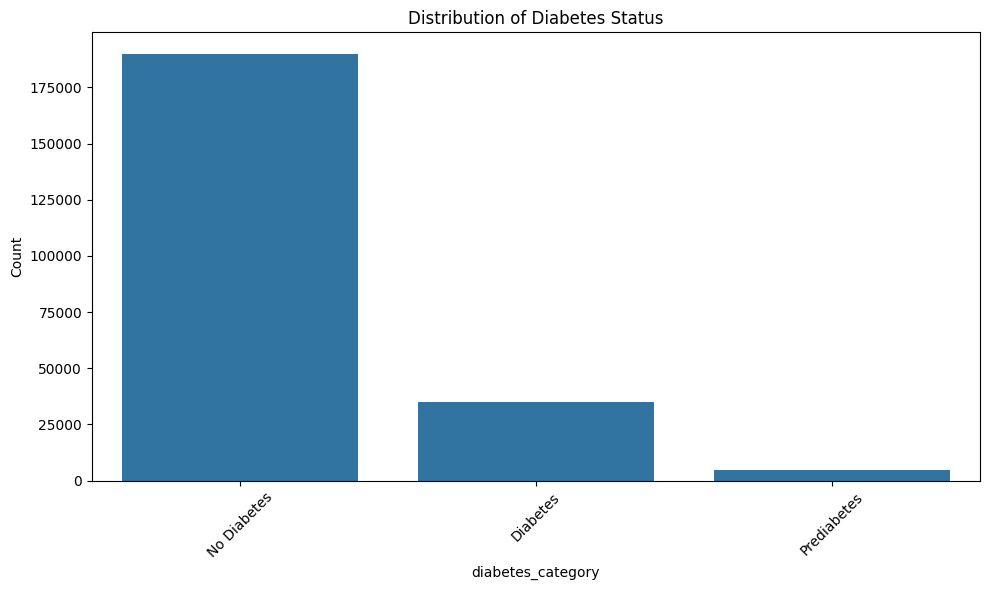

<Figure size 1200x600 with 0 Axes>

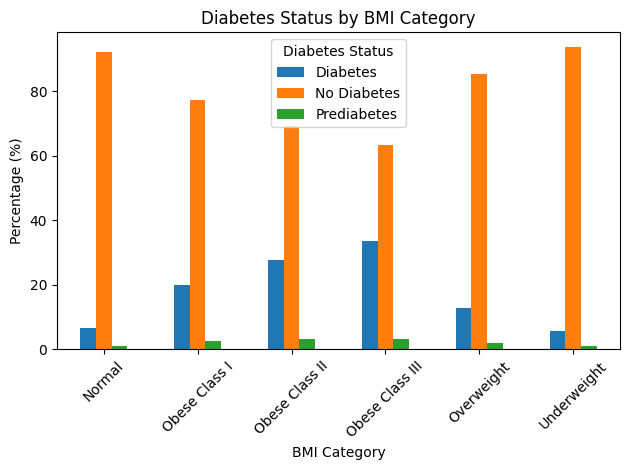

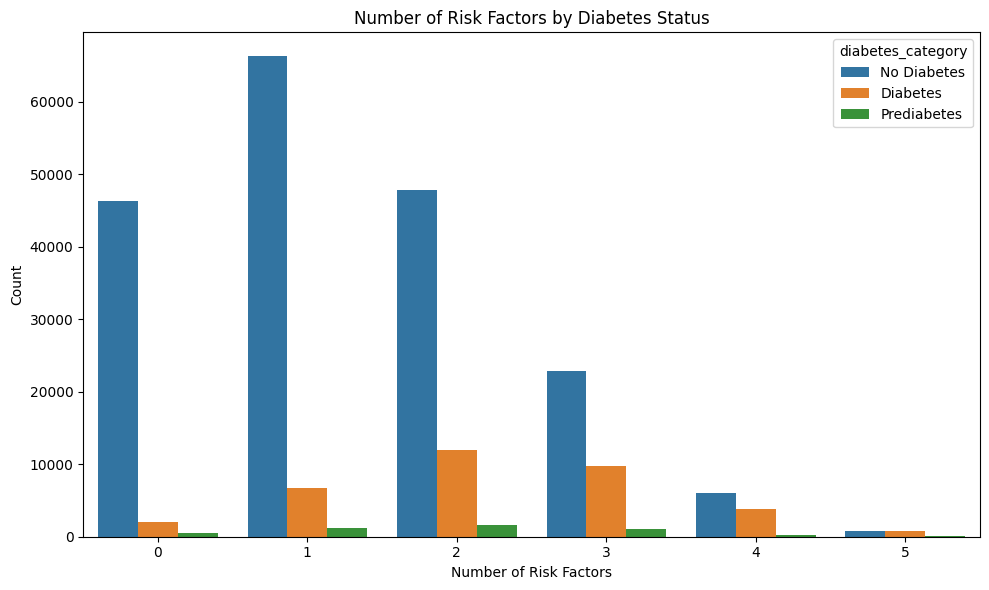

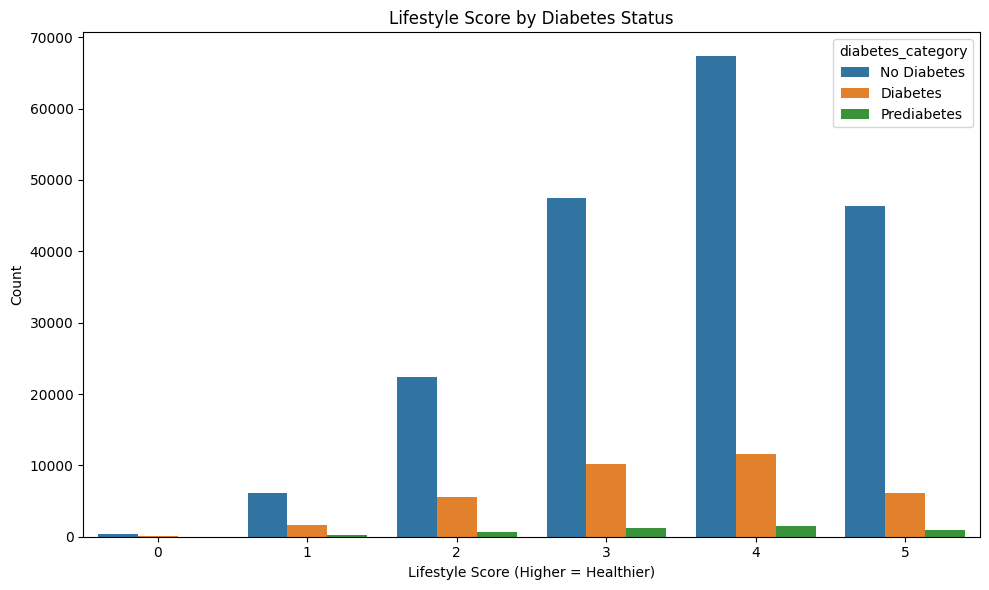

<Figure size 1400x700 with 0 Axes>

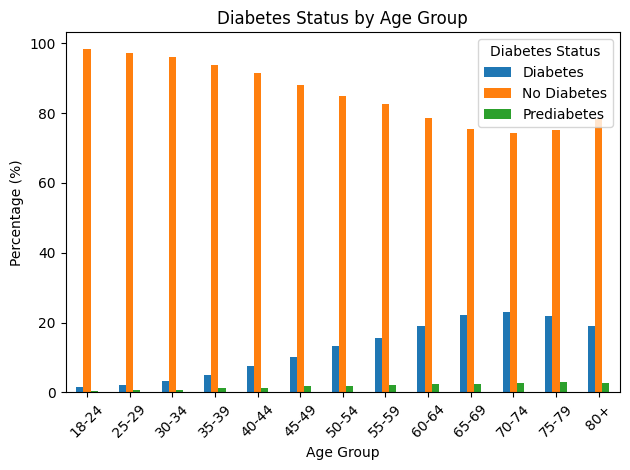

<Figure size 1200x600 with 0 Axes>

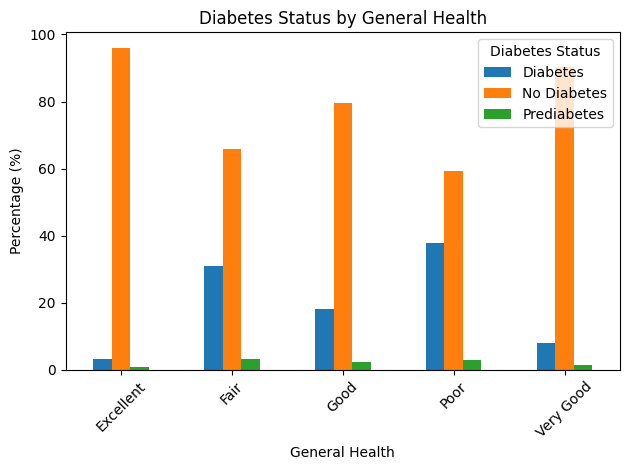

In [ ]:
# 5. Visualization

# 5.1 Distribution of Diabetes Status
plt.figure(figsize=(10, 6))
diabetes_counts = df_subset['diabetes_category'].value_counts()
sns.barplot(x=diabetes_counts.index, y=diabetes_counts.values)
plt.title('Distribution of Diabetes Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('diabetes_distribution.png')

# 5.2 BMI Categories by Diabetes Status
plt.figure(figsize=(12, 6))
cross_tab = pd.crosstab(df_subset['bmi_category'], df_subset['diabetes_category'], normalize='index') * 100
cross_tab.plot(kind='bar', stacked=False)
plt.title('Diabetes Status by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Diabetes Status')
plt.tight_layout()
plt.savefig('diabetes_by_bmi.png')

# 5.3 Risk Factors vs Diabetes
plt.figure(figsize=(10, 6))
sns.countplot(data=df_subset, x='risk_factor_count', hue='diabetes_category')
plt.title('Number of Risk Factors by Diabetes Status')
plt.xlabel('Number of Risk Factors')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('risk_factors_by_diabetes.png')

# 5.4 Lifestyle Score vs Diabetes
plt.figure(figsize=(10, 6))
sns.countplot(data=df_subset, x='lifestyle_score', hue='diabetes_category')
plt.title('Lifestyle Score by Diabetes Status')
plt.xlabel('Lifestyle Score (Higher = Healthier)')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('lifestyle_score_by_diabetes.png')

# 5.5 Age Group Distribution by Diabetes Status
plt.figure(figsize=(14, 7))
age_diabetes = pd.crosstab(df_subset['age_group'], df_subset['diabetes_category'], normalize='index') * 100
age_diabetes.plot(kind='bar')
plt.title('Diabetes Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Diabetes Status')
plt.tight_layout()
plt.savefig('diabetes_by_age.png')

# 5.6 General Health vs Diabetes Status
plt.figure(figsize=(12, 6))
health_diabetes = pd.crosstab(df_subset['general_health_category'],
                              df_subset['diabetes_category'], normalize='index') * 100
health_diabetes.plot(kind='bar')
plt.title('Diabetes Status by General Health')
plt.xlabel('General Health')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Diabetes Status')
plt.tight_layout()
plt.savefig('diabetes_by_general_health.png')

In [ ]:
  # 8. Summary of Data Cleanup Actions
  print("\n--- Summary of Data Cleanup Actions ---")
  print("1. Renamed columns for better readability")
  print("2. Converted numerical categories to descriptive values")
  print("3. Created BMI categories based on WHO classifications")
  print("4. Transformed mental and physical health days into meaningful categories")
  print("5. Selected a subset of relevant columns")
  print("6. Created derived features: risk factor count and lifestyle score")
  print("7. Visualized key relationships in the dataset")




--- Summary of Data Cleanup Actions ---
1. Renamed columns for better readability
2. Converted numerical categories to descriptive values
3. Created BMI categories based on WHO classifications
4. Transformed mental and physical health days into meaningful categories
5. Selected a subset of relevant columns
6. Created derived features: risk factor count and lifestyle score
7. Visualized key relationships in the dataset


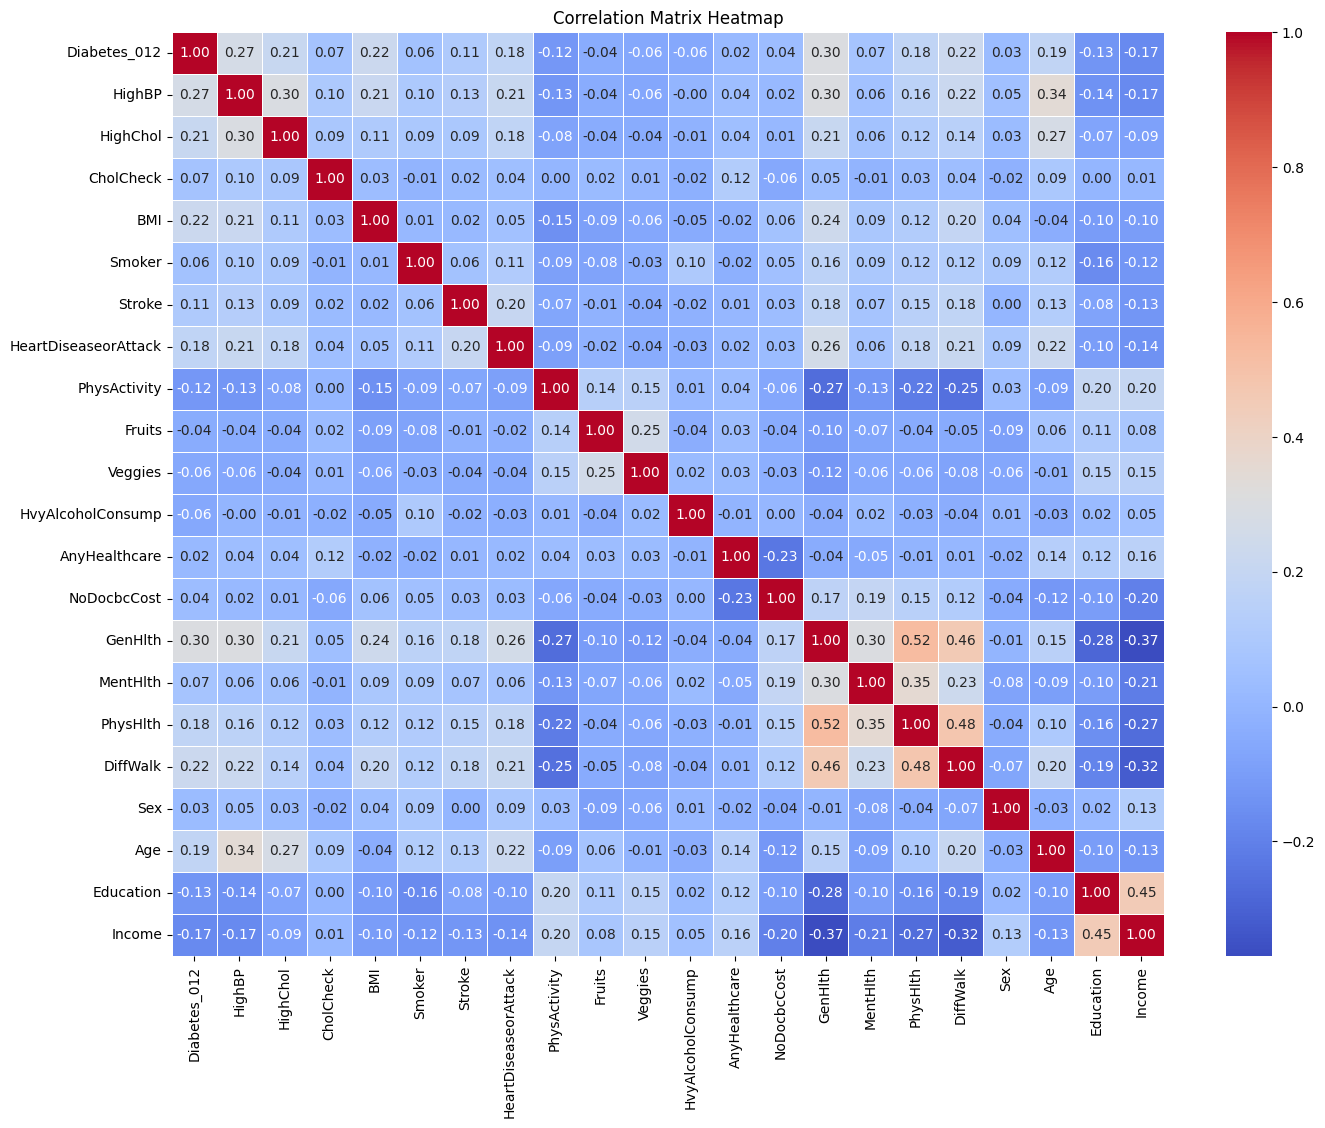

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(16, 12))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:

df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## Using Smote Sampling for Logistic Regression


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         0.0       0.94      0.64      0.76     38116
         1.0       0.03      0.29      0.05       906
         2.0       0.36      0.58      0.44      6935

    accuracy                           0.62     45957
   macro avg       0.44      0.50      0.42     45957
weighted avg       0.84      0.62      0.70     45957

[[24376  6854  6886]
 [  264   261   381]
 [ 1242  1643  4050]]


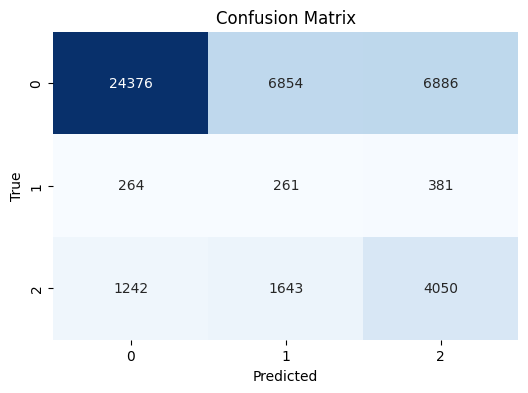

Accuracy: 0.62
Precision: 0.84
Recall: 0.62
F1 Score: 0.70
MSE: 0.91
RMSE: 0.95


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, mean_squared_error

X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize and train a Logistic Regression model
logreg = LogisticRegression(max_iter=1000)  # Increased max_iter
logreg.fit(X_train_resampled, y_train_resampled)


y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
y_true = y_test
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')

## Here we are running the random forest classifation model with random state = **42**

              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90     38116
         1.0       0.00      0.00      0.00       906
         2.0       0.43      0.22      0.29      6935

    accuracy                           0.82     45957
   macro avg       0.43      0.39      0.40     45957
weighted avg       0.77      0.82      0.79     45957

[[36205    65  1846]
 [  792     0   114]
 [ 5417    13  1505]]


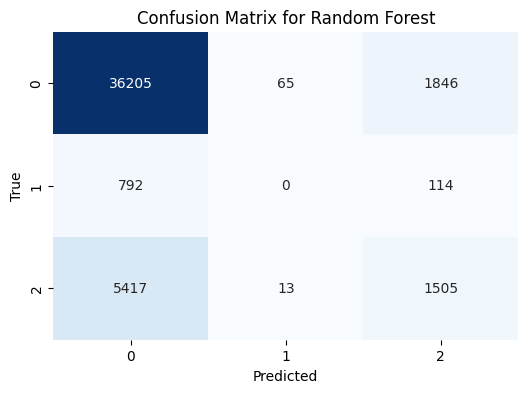

Accuracy (RF): 0.82
Precision (RF): 0.77
Recall (RF): 0.82
F1 Score (RF): 0.79
MSE (RF): 0.65
RMSE (RF): 0.81


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)

y_pred_rf = rf_classifier.predict(X_test)

print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest')
plt.show()

y_true_rf = y_test
accuracy_rf = accuracy_score(y_true_rf, y_pred_rf)
precision_rf = precision_score(y_true_rf, y_pred_rf, average='weighted')
recall_rf = recall_score(y_true_rf, y_pred_rf, average='weighted')
f1_rf = f1_score(y_true_rf, y_pred_rf, average='weighted')
mse_rf = mean_squared_error(y_true_rf, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f'Accuracy (RF): {accuracy_rf:.2f}')
print(f'Precision (RF): {precision_rf:.2f}')
print(f'Recall (RF): {recall_rf:.2f}')
print(f'F1 Score (RF): {f1_rf:.2f}')
print(f'MSE (RF): {mse_rf:.2f}')
print(f'RMSE (RF): {rmse_rf:.2f}')


## Here we used boosting model (XG boost) with random state = 42


              precision    recall  f1-score   support

         0.0       0.87      0.96      0.92     42795
         1.0       0.00      0.00      0.00       944
         2.0       0.51      0.25      0.34      6997

    accuracy                           0.85     50736
   macro avg       0.46      0.40      0.42     50736
weighted avg       0.81      0.85      0.82     50736

[[41251     0  1544]
 [  826     0   118]
 [ 5250     0  1747]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


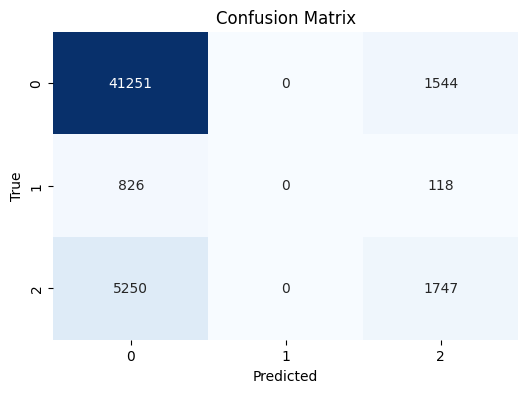

Accuracy: 0.85
Precision: 0.81
Recall: 0.85
F1 Score: 0.82
MSE: 0.55
RMSE: 0.74


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import xgboost as xgb

# Initialize and train an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train_resampled, y_train_resampled)


y_pred = xgb_classifier.predict(X_test)


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

y_true = y_test
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')


## we used S.v.m with random state = 42
## Recommende not to run the blow code, Because it is taking a lot of time.

              precision    recall  f1-score   support

         0.0       0.95      0.61      0.74     38116
         1.0       0.03      0.31      0.06       906
         2.0       0.35      0.62      0.45      6935

    accuracy                           0.60     45957
   macro avg       0.44      0.51      0.42     45957
weighted avg       0.84      0.60      0.68     45957

[[23153  7429  7534]
 [  231   281   394]
 [ 1022  1594  4319]]


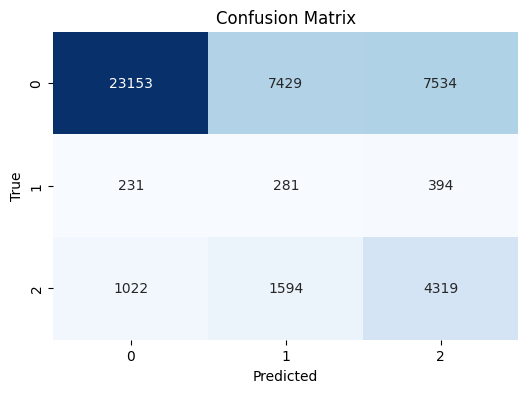

Accuracy: 0.60
Precision: 0.84
Recall: 0.60
F1 Score: 0.68
MSE: 0.95
RMSE: 0.98


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, mean_squared_error

# Initialize and train an SVM classifier
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train_resampled, y_train_resampled)

y_pred = svm_classifier.predict(X_test)


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

y_true = y_test
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')

## here i created a function to run nural network with epohs = 5,10,15 and hidden layers = 10  
## ( not recommend to run, taking long time to run)


Training model with 10 hidden layers and 5 epochs...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
14245/14245 ━━━━━━━━━━━━━━━━━━━━ 75s 5ms/step - accuracy: 0.4966 - loss: 0.9762
Epoch 2/5
14245/14245 ━━━━━━━━━━━━━━━━━━━━ 80s 5ms/step - accuracy: 0.5417 - loss: 0.9168
Epoch 3/5
14245/14245 ━━━━━━━━━━━━━━━━━━━━ 70s 5ms/step - accuracy: 0.6148 - loss: 0.7966
Epoch 4/5
14245/14245 ━━━━━━━━━━━━━━━━━━━━ 82s 5ms/step - accuracy: 0.6283 - loss: 0.7651
Epoch 5/5
14245/14245 ━━━━━━━━━━━━━━━━━━━━ 81s 5ms/step - accuracy: 0.6377 - loss: 0.7470
1437/1437 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step

Classification Report for 5 epochs:
              precision    recall  f1-score   support

         0.0       0.92      0.72      0.81     38116
         1.0       0.03      0.22      0.06       906
         2.0       0.37      0.51      0.43      6935

    accuracy                           0.68     45957
   macro avg       0.44      0.48      0.43     45957
weighted avg       0.82      0.68      0.74     45957


Training model with 10 hidden layers and 10 epochs...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
14245/14245 ━━━━━━━━━━━━━━━━━━━━ 81s 5ms/step - accuracy: 0.4991 - loss: 0.9745
Epoch 2/10
14245/14245 ━━━━━━━━━━━━━━━━━━━━ 71s 5ms/step - accuracy: 0.5468 - loss: 0.9179
Epoch 3/10
14245/14245 ━━━━━━━━━━━━━━━━━━━━ 70s 5ms/step - accuracy: 0.6003 - loss: 0.8252
Epoch 4/10
14245/14245 ━━━━━━━━━━━━━━━━━━━━ 82s 5ms/step - accuracy: 0.6163 - loss: 0.7923
Epoch 5/10
14245/14245 ━━━━━━━━━━━━━━━━━━━━ 81s 5ms/step - accuracy: 0.6272 - loss: 0.7683
Epoch 6/10
14245/14245 ━━━━━━━━━━━━━━━━━━━━ 70s 5ms/step - accuracy: 0.6364 - loss: 0.7484
Epoch 7/10
14245/14245 ━━━━━━━━━━━━━━━━━━━━ 70s 5ms/step - accuracy: 0.6427 - loss: 0.7376
Epoch 8/10
14245/14245 ━━━━━━━━━━━━━━━━━━━━ 81s 5ms/step - accuracy: 0.6466 - loss: 0.7285
Epoch 9/10
14245/14245 ━━━━━━━━━━━━━━━━━━━━ 69s 5ms/step - accuracy: 0.6498 - loss: 0.7219
Epoch 10/10
14245/14245 ━━━━━━━━━━━━━━━━━━━━ 81s 5ms/step - accuracy: 0.6529 - loss: 0.7134
1437/1437 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step

Classification Report for 10 epochs:
        

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
14245/14245 ━━━━━━━━━━━━━━━━━━━━ 77s 5ms/step - accuracy: 0.4972 - loss: 0.9764
Epoch 2/15
14245/14245 ━━━━━━━━━━━━━━━━━━━━ 78s 6ms/step - accuracy: 0.5415 - loss: 0.9243
Epoch 3/15
14245/14245 ━━━━━━━━━━━━━━━━━━━━ 75s 5ms/step - accuracy: 0.5955 - loss: 0.8343
Epoch 4/15
14245/14245 ━━━━━━━━━━━━━━━━━━━━ 78s 5ms/step - accuracy: 0.6215 - loss: 0.7829
Epoch 5/15
14245/14245 ━━━━━━━━━━━━━━━━━━━━ 73s 5ms/step - accuracy: 0.6362 - loss: 0.7533
Epoch 6/15
14245/14245 ━━━━━━━━━━━━━━━━━━━━ 84s 5ms/step - accuracy: 0.6423 - loss: 0.7368
Epoch 7/15
14245/14245 ━━━━━━━━━━━━━━━━━━━━ 74s 5ms/step - accuracy: 0.6477 - loss: 0.7251
Epoch 8/15
14245/14245 ━━━━━━━━━━━━━━━━━━━━ 81s 5ms/step - accuracy: 0.6522 - loss: 0.7185
Epoch 9/15
14245/14245 ━━━━━━━━━━━━━━━━━━━━ 82s 5ms/step - accuracy: 0.6570 - loss: 0.7114
Epoch 10/15
14245/14245 ━━━━━━━━━━━━━━━━━━━━ 73s 5ms/step - accuracy: 0.6613 - loss: 0.7010
Epoch 11/15
14245/14245 ━━━━━━━━━━━━━━━━━━━━ 73s 5ms/step - accuracy: 0.6649 - loss: 0.69

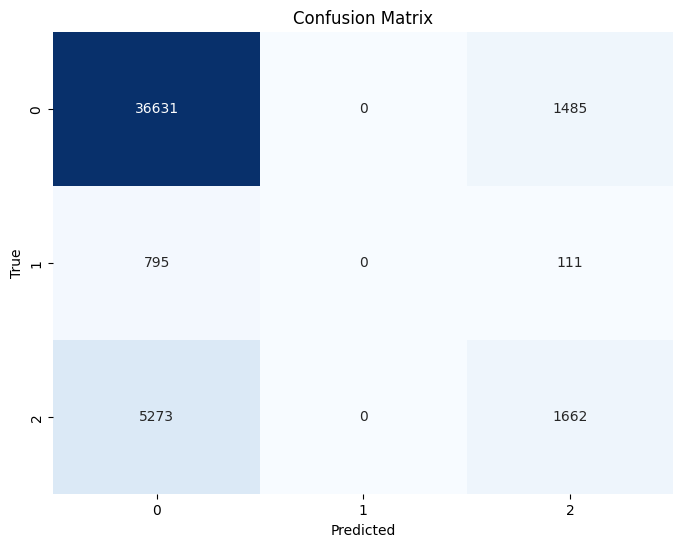

Accuracy: 0.83
Precision: 0.79
Recall: 0.83
F1 Score: 0.80
MSE: 0.61
RMSE: 0.78


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

def build_and_train_model(X_train, y_train, X_test, y_test, epochs_list, num_hidden_layers, neurons_per_layer=[64, 32], activation='relu'):
  """ Returns:
    - Dictionary containing classification reports for each epoch value
    """
  results = {}


  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  smote = SMOTE(random_state=42)
  X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Adjust neurons_per_layer if num_hidden_layers is different
  if len(neurons_per_layer) < num_hidden_layers:
        neurons_per_layer = neurons_per_layer + [neurons_per_layer[-1]] * (num_hidden_layers - len(neurons_per_layer))
  elif len(neurons_per_layer) > num_hidden_layers:
        neurons_per_layer = neurons_per_layer[:num_hidden_layers]

  for epochs in epochs_list:
      print(f"\nTraining model with {num_hidden_layers} hidden layers and {epochs} epochs...")

       # Build the model
      model = keras.Sequential()

        # Input layer and first hidden layer
      model.add(keras.layers.Dense(neurons_per_layer[0], activation=activation, input_shape=(X_train.shape[1],)))

        # Additional hidden layers
      for i in range(1, num_hidden_layers):
            model.add(keras.layers.Dense(neurons_per_layer[i], activation=activation))

        # Output layer
      model.add(keras.layers.Dense(3, activation='softmax'))

        # Compile the model
      model.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',  # Fixed typo in loss function
                     metrics=['accuracy'])

        # Train the model
      model.fit(X_train_resampled, y_train_resampled, epochs=epochs, batch_size=32, verbose=1)

        # Predict on test set
      y_pred_prob = model.predict(X_test)
      y_pred = np.argmax(y_pred_prob, axis=1)

        # Store classification report
      report = classification_report(y_test, y_pred, output_dict=True)
      results[f'epochs_{epochs}'] = report

        # Print classification report
      print(f"\nClassification Report for {epochs} epochs:")
      print(classification_report(y_test, y_pred))

  return results
epochs_list = [5, 10, 15]
num_hidden_layers = 10
results = build_and_train_model(X_train, y_train, X_test, y_test, epochs_list, num_hidden_layers)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')

## From here we are using unbersapmling method for smapling the data
## Now we first run logistic regression

              precision    recall  f1-score   support

         0.0       0.95      0.66      0.78     42795
         1.0       0.03      0.31      0.06       944
         2.0       0.35      0.59      0.44      6997

    accuracy                           0.65     50736
   macro avg       0.45      0.52      0.43     50736
weighted avg       0.85      0.65      0.72     50736

[[28323  7269  7203]
 [  269   293   382]
 [ 1120  1764  4113]]


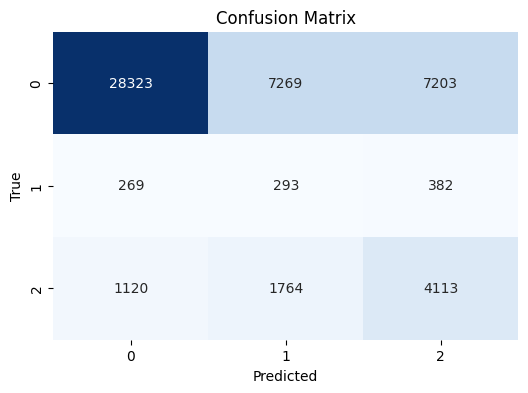

Accuracy: 0.65
Precision: 0.85
Recall: 0.65
F1 Score: 0.72
MSE: 0.85
RMSE: 0.92


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Apply RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

# Initialize and train a Logistic Regression model on the undersampled data
logreg_undersampled = LogisticRegression(max_iter=1000)
logreg_undersampled.fit(X_train_undersampled, y_train_undersampled)

y_pred_undersampled = logreg_undersampled.predict(X_test)


print(classification_report(y_test, y_pred_undersampled))
print(confusion_matrix(y_test, y_pred_undersampled))
cm = confusion_matrix(y_test, y_pred_undersampled)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred_undersampled)
precision = precision_score(y_test, y_pred_undersampled, average='weighted')
recall = recall_score(y_test, y_pred_undersampled, average='weighted')
f1 = f1_score(y_test, y_pred_undersampled, average='weighted')
mse = mean_squared_error(y_test, y_pred_undersampled)
rmse = np.sqrt(mse)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')

## Now, We have runed random forest with undersamplimg data

              precision    recall  f1-score   support

         0.0       0.95      0.59      0.73     42795
         1.0       0.03      0.34      0.05       944
         2.0       0.32      0.54      0.40      6997

    accuracy                           0.58     50736
   macro avg       0.43      0.49      0.39     50736
weighted avg       0.85      0.58      0.67     50736

[[25400  9527  7868]
 [  257   325   362]
 [ 1008  2194  3795]]


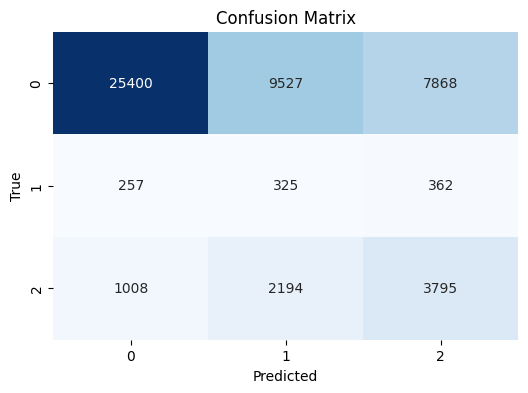

Accuracy: 0.58
Precision: 0.85
Recall: 0.58
F1 Score: 0.67
MSE: 0.94
RMSE: 0.97


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Apply RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)


rf_classifier_undersampled = RandomForestClassifier(random_state=42)
rf_classifier_undersampled.fit(X_train_undersampled, y_train_undersampled)


y_pred_undersampled = rf_classifier_undersampled.predict(X_test)

print(classification_report(y_test, y_pred_undersampled))
print(confusion_matrix(y_test, y_pred_undersampled))

cm = confusion_matrix(y_test, y_pred_undersampled)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred_undersampled)
precision = precision_score(y_test, y_pred_undersampled, average='weighted')
recall = recall_score(y_test, y_pred_undersampled, average='weighted')
f1 = f1_score(y_test, y_pred_undersampled, average='weighted')
mse = mean_squared_error(y_test, y_pred_undersampled)
rmse = np.sqrt(mse)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')

## Running the boosting (XG BOOST)

              precision    recall  f1-score   support

         0.0       0.95      0.60      0.73     42795
         1.0       0.03      0.37      0.05       944
         2.0       0.32      0.53      0.40      6997

    accuracy                           0.58     50736
   macro avg       0.43      0.50      0.40     50736
weighted avg       0.85      0.58      0.68     50736

[[25590  9510  7695]
 [  244   351   349]
 [ 1028  2243  3726]]


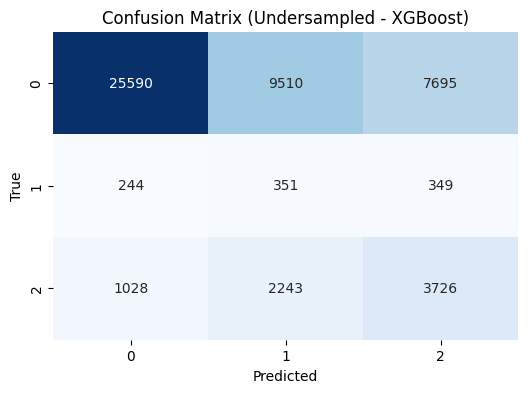

Accuracy (Undersampled - XGBoost): 0.58
Precision (Undersampled - XGBoost): 0.85
Recall (Undersampled - XGBoost): 0.58
F1 Score (Undersampled - XGBoost): 0.68
MSE (Undersampled - XGBoost): 0.93
RMSE (Undersampled - XGBoost): 0.96


In [ ]:
import xgboost as xgb
# Initialize and train an XGBoost classifier on undersampled data
xgb_classifier_undersampled = xgb.XGBClassifier(random_state=42)
xgb_classifier_undersampled.fit(X_train_undersampled, y_train_undersampled)

y_pred_undersampled = xgb_classifier_undersampled.predict(X_test)

print(classification_report(y_test, y_pred_undersampled))
print(confusion_matrix(y_test, y_pred_undersampled))

cm_undersampled = confusion_matrix(y_test, y_pred_undersampled)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_undersampled, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Undersampled - XGBoost)')
plt.show()

accuracy_undersampled = accuracy_score(y_test, y_pred_undersampled)
precision_undersampled = precision_score(y_test, y_pred_undersampled, average='weighted')
recall_undersampled = recall_score(y_test, y_pred_undersampled, average='weighted')
f1_undersampled = f1_score(y_test, y_pred_undersampled, average='weighted')
mse_undersampled = mean_squared_error(y_test, y_pred_undersampled)
rmse_undersampled = np.sqrt(mse_undersampled)

print(f'Accuracy (Undersampled - XGBoost): {accuracy_undersampled:.2f}')
print(f'Precision (Undersampled - XGBoost): {precision_undersampled:.2f}')
print(f'Recall (Undersampled - XGBoost): {recall_undersampled:.2f}')
print(f'F1 Score (Undersampled - XGBoost): {f1_undersampled:.2f}')
print(f'MSE (Undersampled - XGBoost): {mse_undersampled:.2f}')
print(f'RMSE (Undersampled - XGBoost): {rmse_undersampled:.2f}')

# From here on we will use Class weighing sampling Method
## First we will run Logistic Regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         0.0       0.94      0.64      0.77     38116
         1.0       0.03      0.29      0.06       906
         2.0       0.36      0.59      0.45      6935

    accuracy                           0.63     45957
   macro avg       0.44      0.51      0.42     45957
weighted avg       0.84      0.63      0.70     45957

[[24548  6731  6837]
 [  265   264   377]
 [ 1241  1615  4079]]


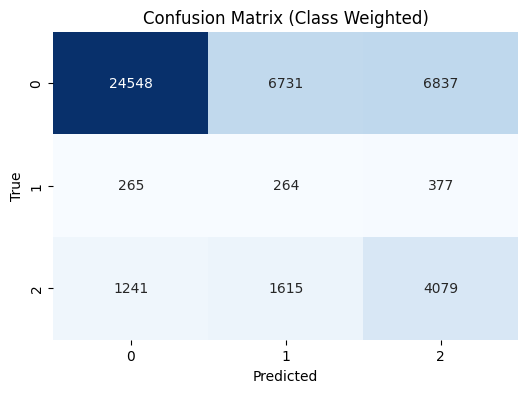

Accuracy (Class Weighted): 0.63
Precision (Class Weighted): 0.84
Recall (Class Weighted): 0.63
F1 Score (Class Weighted): 0.70
MSE (Class Weighted): 0.90
RMSE (Class Weighted): 0.95


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Initialize and train a Logistic Regression model with class weights
# Instead of passing 'class_weight' directly, use a parameter to set it if available
logreg_weighted = LogisticRegression(max_iter=1000)  # Initialize first
# Check if class_weight is a valid parameter before using it
if 'class_weight' in logreg_weighted.get_params():
    logreg_weighted.set_params(class_weight=class_weights_dict)
logreg_weighted.fit(X_train, y_train)


y_pred_weighted = logreg_weighted.predict(X_test)

print(classification_report(y_test, y_pred_weighted))
print(confusion_matrix(y_test, y_pred_weighted))

cm_weighted = confusion_matrix(y_test, y_pred_weighted)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_weighted, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Class Weighted)')
plt.show()

accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
precision_weighted = precision_score(y_test, y_pred_weighted, average='weighted')
recall_weighted = recall_score(y_test, y_pred_weighted, average='weighted')
f1_weighted = f1_score(y_test, y_pred_weighted, average='weighted')
mse_weighted = mean_squared_error(y_test, y_pred_weighted)
rmse_weighted = np.sqrt(mse_weighted)

print(f'Accuracy (Class Weighted): {accuracy_weighted:.2f}')
print(f'Precision (Class Weighted): {precision_weighted:.2f}')
print(f'Recall (Class Weighted): {recall_weighted:.2f}')
print(f'F1 Score (Class Weighted): {f1_weighted:.2f}')
print(f'MSE (Class Weighted): {mse_weighted:.2f}')
print(f'RMSE (Class Weighted): {rmse_weighted:.2f}')

### Using Class weighing sampling for Randomforest

              precision    recall  f1-score   support

         0.0       0.85      0.97      0.90     38116
         1.0       0.00      0.00      0.00       906
         2.0       0.46      0.16      0.24      6935

    accuracy                           0.83     45957
   macro avg       0.43      0.38      0.38     45957
weighted avg       0.77      0.83      0.78     45957

[[36809    62  1245]
 [  825     0    81]
 [ 5809    12  1114]]


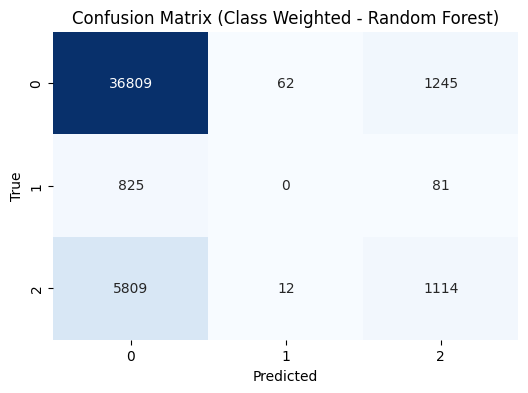

Accuracy (Class Weighted - Random Forest): 0.83
Precision (Class Weighted - Random Forest): 0.77
Recall (Class Weighted - Random Forest): 0.83
F1 Score (Class Weighted - Random Forest): 0.78
MSE (Class Weighted - Random Forest): 0.64
RMSE (Class Weighted - Random Forest): 0.80


In [ ]:
# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Initialize and train a RandomForestClassifier with class weights
rf_classifier_weighted = RandomForestClassifier(random_state=42, class_weight=class_weights_dict)
rf_classifier_weighted.fit(X_train, y_train)


y_pred_weighted = rf_classifier_weighted.predict(X_test)


print(classification_report(y_test, y_pred_weighted))
print(confusion_matrix(y_test, y_pred_weighted))

cm_weighted = confusion_matrix(y_test, y_pred_weighted)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_weighted, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Class Weighted - Random Forest)')
plt.show()

accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
precision_weighted = precision_score(y_test, y_pred_weighted, average='weighted')
recall_weighted = recall_score(y_test, y_pred_weighted, average='weighted')
f1_weighted = f1_score(y_test, y_pred_weighted, average='weighted')
mse_weighted = mean_squared_error(y_test, y_pred_weighted)
rmse_weighted = np.sqrt(mse_weighted)

print(f'Accuracy (Class Weighted - Random Forest): {accuracy_weighted:.2f}')
print(f'Precision (Class Weighted - Random Forest): {precision_weighted:.2f}')
print(f'Recall (Class Weighted - Random Forest): {recall_weighted:.2f}')
print(f'F1 Score (Class Weighted - Random Forest): {f1_weighted:.2f}')
print(f'MSE (Class Weighted - Random Forest): {mse_weighted:.2f}')
print(f'RMSE (Class Weighted - Random Forest): {rmse_weighted:.2f}')

### Using calss weighing sanpling for XG BOOST

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:58:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

         0.0       0.95      0.66      0.78     42795
         1.0       0.03      0.26      0.06       944
         2.0       0.33      0.64      0.44      6997

    accuracy                           0.65     50736
   macro avg       0.44      0.52      0.43     50736
weighted avg       0.85      0.65      0.72     50736

[[28140  6064  8591]
 [  270   250   424]
 [ 1104  1382  4511]]


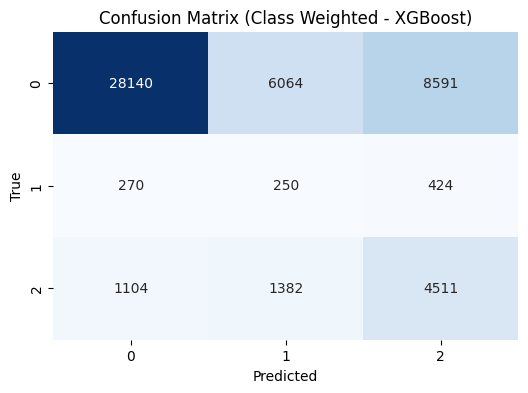

Accuracy (Class Weighted - XGBoost): 0.65
Precision (Class Weighted - XGBoost): 0.85
Recall (Class Weighted - XGBoost): 0.65
F1 Score (Class Weighted - XGBoost): 0.72
MSE (Class Weighted - XGBoost): 0.92
RMSE (Class Weighted - XGBoost): 0.96


In [ ]:
# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Initialize and train an XGBoost classifier with class weights
xgb_classifier_weighted = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_classifier_weighted.fit(X_train, y_train, sample_weight=np.array([class_weights_dict[i] for i in y_train]))



y_pred_weighted = xgb_classifier_weighted.predict(X_test)


print(classification_report(y_test, y_pred_weighted))
print(confusion_matrix(y_test, y_pred_weighted))

cm_weighted = confusion_matrix(y_test, y_pred_weighted)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_weighted, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Class Weighted - XGBoost)')
plt.show()

accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
precision_weighted = precision_score(y_test, y_pred_weighted, average='weighted')
recall_weighted = recall_score(y_test, y_pred_weighted, average='weighted')
f1_weighted = f1_score(y_test, y_pred_weighted, average='weighted')
mse_weighted = mean_squared_error(y_test, y_pred_weighted)
rmse_weighted = np.sqrt(mse_weighted)

print(f'Accuracy (Class Weighted - XGBoost): {accuracy_weighted:.2f}')
print(f'Precision (Class Weighted - XGBoost): {precision_weighted:.2f}')
print(f'Recall (Class Weighted - XGBoost): {recall_weighted:.2f}')
print(f'F1 Score (Class Weighted - XGBoost): {f1_weighted:.2f}')
print(f'MSE (Class Weighted - XGBoost): {mse_weighted:.2f}')
print(f'RMSE (Class Weighted - XGBoost): {rmse_weighted:.2f}')

### Creating neural network using class weighing sampling

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.5376 - loss: 1.0416
Epoch 2/10
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.6224 - loss: 0.9523
Epoch 3/10
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.5907 - loss: 0.9687
Epoch 4/10
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6121 - loss: 0.9610
Epoch 5/10
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6015 - loss: 0.9587
Epoch 6/10
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6083 - loss: 0.9535
Epoch 7/10
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6056 - loss: 0.9505
Epoch 8/10
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.5968 - loss: 0.9579
Epoch 9/10
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6087 - loss: 0.9574
Epoch 10/10
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6108 - loss: 0.9565
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
              precision    recall  f1-score   support

         0.

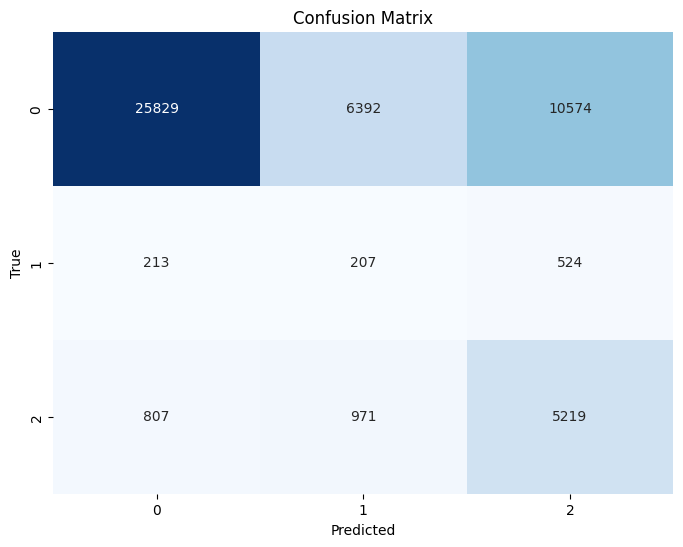

Accuracy: 0.62
Precision: 0.86
Recall: 0.62
F1 Score: 0.69
MSE: 1.06
RMSE: 1.03


In [ ]:
import tensorflow as tf
from tensorflow import keras

# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Define the model with class weights, creating a neural network.
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(X_train, y_train, epochs=10, batch_size=32, class_weight=class_weights_dict)



y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)


print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')

# Using the class weighing sampling for Random forest model we are predicting the Diabetes Status

In [ ]:

import numpy as np

# Assuming rf_classifier_weighted is your trained RandomForestClassifier model
# and X_train.columns contains the feature names

def predict_diabetes():
  """Collects user input and predicts diabetes status using the trained model."""

  input_data = {}
  for col in X_train.columns:
      while True:
          try:
              value = float(input(f"Enter value for {col}: "))
              input_data[col] = value
              break
          except ValueError:
              print("Invalid input. Please enter a numeric value.")

  # Create a DataFrame from the user input
  input_df = pd.DataFrame([input_data])

  # Make prediction
  prediction = rf_classifier_weighted.predict(input_df)[0]

  # Map prediction to diabetes status
  diabetes_status = {0: "Non-diabetic", 1: "Pre-diabetic", 2: "Diabetic"}
  print(f"\nPredicted Diabetes Status: {diabetes_status[prediction]}")

predict_diabetes()


Enter value for HighBP: 0
Enter value for HighChol: 0
Enter value for CholCheck: 1
Enter value for BMI: 40
Enter value for Smoker: 0
Enter value for Stroke: 0
Enter value for HeartDiseaseorAttack: 0
Enter value for PhysActivity: 1
Enter value for Fruits: 1
Enter value for Veggies: 1
Enter value for HvyAlcoholConsump: 1
Enter value for AnyHealthcare: 0
Enter value for NoDocbcCost: 0
Enter value for GenHlth: 2
Enter value for MentHlth: 10
Enter value for PhysHlth: 10
Enter value for DiffWalk: 0
Enter value for Sex: 1
Enter value for Age: 1
Enter value for Education: 6
Enter value for Income: 1

Predicted Diabetes Status: Non-diabetic
